# Loading Libraries

In [2]:
import pandas as pd 
import numpy as np  
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder 
from sklearn.svm import SVC 
from sklearn import metrics 
from sklearn.model_selection import cross_val_score 

%matplotlib inline 

# Loading and displaying data

In [4]:
df = pd.read_csv(r'C:\Users\Admin\OneDrive - National University of Sciences & Technology\Desktop\Python-Lectures\voice.csv')
df.head() 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df.isnull().values ## Checking for empty entries
df.isnull().values.any()## Checking for empty entries

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
df.isnull().sum() ## Agreggating missing values

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [7]:
df.corr() ## Correlation matrix

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [8]:
df.shape ## Dimension of data

(3168, 21)

In [9]:
print("Total number of labels: {}".format(df.shape[0])) 
print("Number of male: {}".format(df[df.label == 'male'].shape[0])) 

print("Number of female: {}".format(df[df.label == 'female'].shape[0])) 

Total number of labels: 3168
Number of male: 1584
Number of female: 1584


In [20]:
X=df.iloc[:, :-1] ## Excluding the target variable
X.head() 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274


Q: if we want to display entire dataset in the form of dataframe what function to use?

hint: pd.set_option("display.max_rows", None, "display.max_columns", None)

# Label Encoding 
For our machine learning algorithms to run, it is required that our label values are in the form of numerical values. In label encoding, we temporarily replace the categorical value of a label with a numeric value between 0 and the number of classes minus 1. For example if we have two labels a & b, we will replace the label a with 0 and the label b with (2-1)=1. Similarly with three labels, we will replace them with 0,1,2 and so on.

In [21]:
y=df.iloc[:,-1] 

# Encode label category
# male -> 1
# female -> 0

gender_encoder = LabelEncoder() 
y = gender_encoder.fit_transform(y) 
y 

array([1, 1, 1, ..., 0, 0, 0])

In [23]:
scaler = StandardScaler()  
scaler.fit(X) 
X = scaler.transform(X) 

Q: What is the range of feature values we receive after applying standScaler()? 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

# SVM Default Kernel

In [25]:
svc=SVC() 
svc.fit(X_train,y_train) 
y_pred=svc.predict(X_test) 
print('Testing Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
print('Training Accuracy Score:')
y_predTrain=svc.predict(X_train) 
print(metrics.accuracy_score(y_train,y_predTrain))

Testing Accuracy Score:
0.9763406940063092
Training Accuracy Score:
0.9865824782951855


Text(83.40000000000006, 0.5, 'True value')

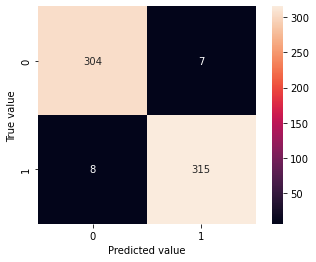

In [26]:
cm= metrics.confusion_matrix(y_test,y_pred) 
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True) 
plt.xlabel('Predicted value') #label x-axis as predicted label
plt.ylabel('True value')

In [27]:
print(metrics.classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       311
           1       0.98      0.98      0.98       323

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



The reported averages include 
macro average (averaging the unweighted mean per label), 
weighted average (averaging the support-weighted mean per label),  
Recall 0 means is the total no of zero correcty predicted from total zeros
For  binary two classs classification problem, recall of the positive class is also known as “sensitivity”; recall of the negative class is “specificity”.

Applying cross validation 

In [28]:
scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') 
print(scores)

[0.93375394 0.95583596 0.96845426 0.96214511 0.96529968 0.99684543
 0.99053628 0.98422713 0.91455696 0.99367089]


In [29]:
print(scores.mean()) 

0.9665325639899376


In [33]:
C_range=list(range(1,30)) ## Changing penality parameter
acc_score=[] 
for c in C_range: 
  svc = SVC(C=c) 
  scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
  acc_score.append(scores.mean()) 
print(acc_score) 

[0.9665325639899376, 0.965268737771034, 0.964636824661582, 0.964954278640738, 0.963373996725632, 0.963373996725632, 0.9627430818991334, 0.9614812522461366, 0.9608473425707784, 0.9602164277442797, 0.9589526015253764, 0.9586371441121271, 0.9576897735894262, 0.9576907718723795, 0.9570588587629277, 0.9573733178932239, 0.9573743161761771, 0.9567434013496786, 0.9570588587629277, 0.9567434013496786, 0.9567424030667254, 0.9564269456534762, 0.9567434013496786, 0.9561114882402268, 0.9557960308269775, 0.9561114882402268, 0.9554795751307751, 0.9548486603042766, 0.9554805734137284]


([<matplotlib.axis.XTick at 0x13d0e4ef100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

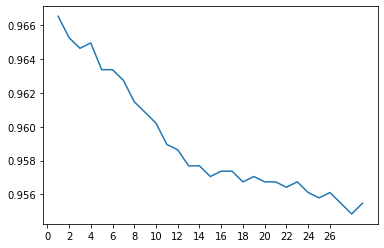

In [34]:
plt.plot(C_range,acc_score) 
plt.xticks(np.arange(0,27,2))

#TO DO label the x-axis as Value of C for SVC

# To DO Label the y-axis as Cross-Validated Accuracy


Q: From the plot which value of c gives the best accuracy score? 

Q: How many values of k fold are used in the this example? 

# Linear Kernel

In [35]:
svc=SVC(kernel='linear') 
#TO Do repeat the above steps for SVM kernel as Linear and compute 
# Train and Test accuracy scores
# Confusion matrix using sns heatmap
# print metrics classification report
# compute cross valifdation score for c=1 and then show its mean value
# compute cross valifdation score for c in range 1 to 26 and then plot the accuracy score 
# Q: what is the best value of regularization parameter for highest accuracy? 

# Rbf Kernel

In [36]:
svc=SVC(kernel='rbf') 
#TO Do repeat the above steps for SVM kernel as rbf and compute 
# Train and Test accuracy scores
# Confusion matrix using sns heatmap
# print metrics classification report
# compute cross valifdation score for c=1 and then show its mean value
# compute cross valifdation score for c in range 1 to 26 and then plot the accuracy score 
# Q: what is the best value of regularization parameter for highest accuracy? 

# Poly Kernel

In [23]:
svc=SVC(kernel='poly') 
#TO Do repeat the above steps for SVM kernel as poly and compute 
# Train and Test accuracy scores
# Confusion matrix using sns heatmap
# print metrics classification report
# compute cross valifdation score for c=1 and then show its mean value
# compute cross valifdation score for c in range 1 to 26 and then plot the accuracy score 
# Q: what is the best value of regularization parameter for highest accuracy? 

Useful links 

SVC : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html 

cross_val_score : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

LabelEncoder : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html